<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


---

Lets start by importing the variables of interest from our Project 3 - Part 1 Fixed Characteristics Notebook.

---

In [3]:
#Takes the variables of interest from Project 3 - Part 1
%store -r house
%store -r mask_train
%store -r mask_test
%store -r fix_feat


no stored variable house
no stored variable mask_train
no stored variable mask_test
no stored variable fix_feat


---

** Exploring Sale Price against Renovateables**

Lets look at some relationships between SalePrice and Renovatable Variables.

A few to note:

* OverallQual
* OverallCond
* ExterQual
* ExterCond
* BsmtQual
* BsmtCond
* BsmtFinType1
* BsmtFinType2
* HeatingQC
* CentralAir
* KitchenQual
* Electrical
* GarageQual
* GarageCond


---

In [ ]:
#Initializes a list of renovatable characteristics: renovatables
renovatables = ["OverallQual", "OverallCond", "ExterQual", 'ExterCond', 'BsmtQual', "BsmtCond", 'BsmtFinType1', 
                       'BsmtFinType2', 'HeatingQC', 'CentralAir','KitchenQual', 'Electrical', 'GarageQual',
                       'GarageCond']


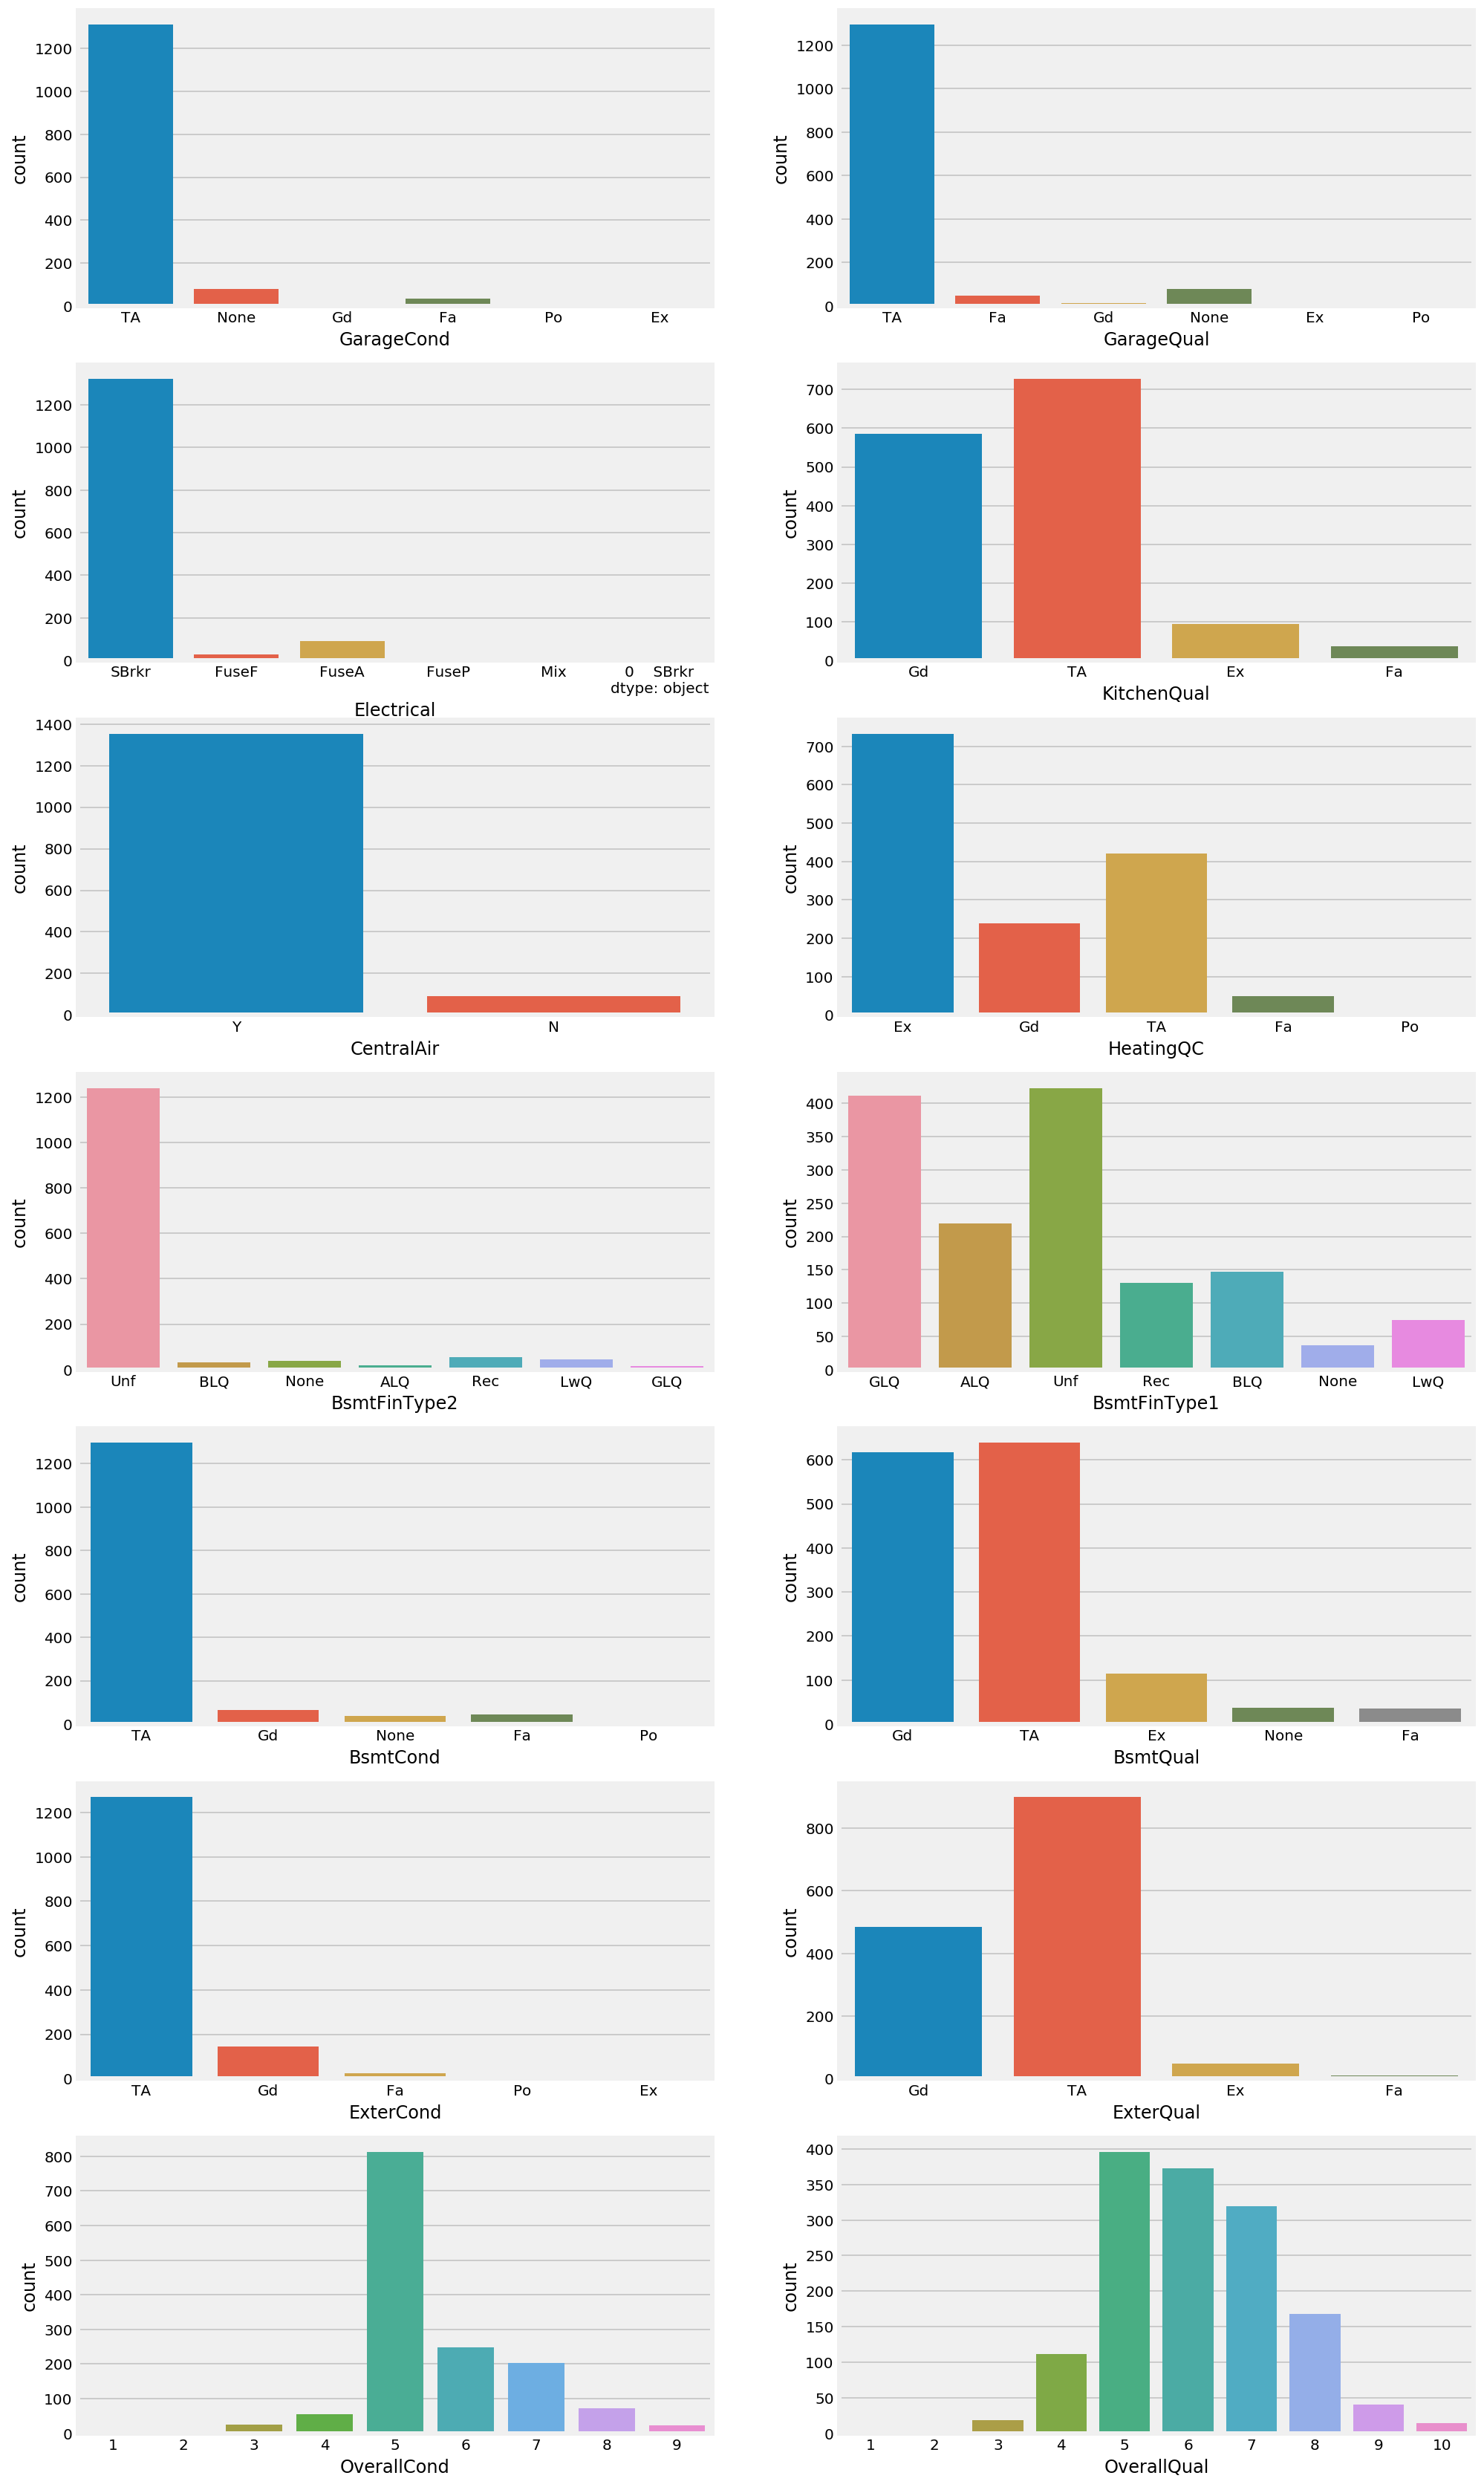

In [5]:
#Plots a countplot/barchart of each renovatable category
fig, ax = plt.subplots(int(len(renovatables)/2),2, figsize = (15,30))
ax = ax.flatten()
for i in range(len(renovatables)):
    ax[i] = sns.countplot(house[renovatables.pop()], ax = ax[i])
    
plt.show()

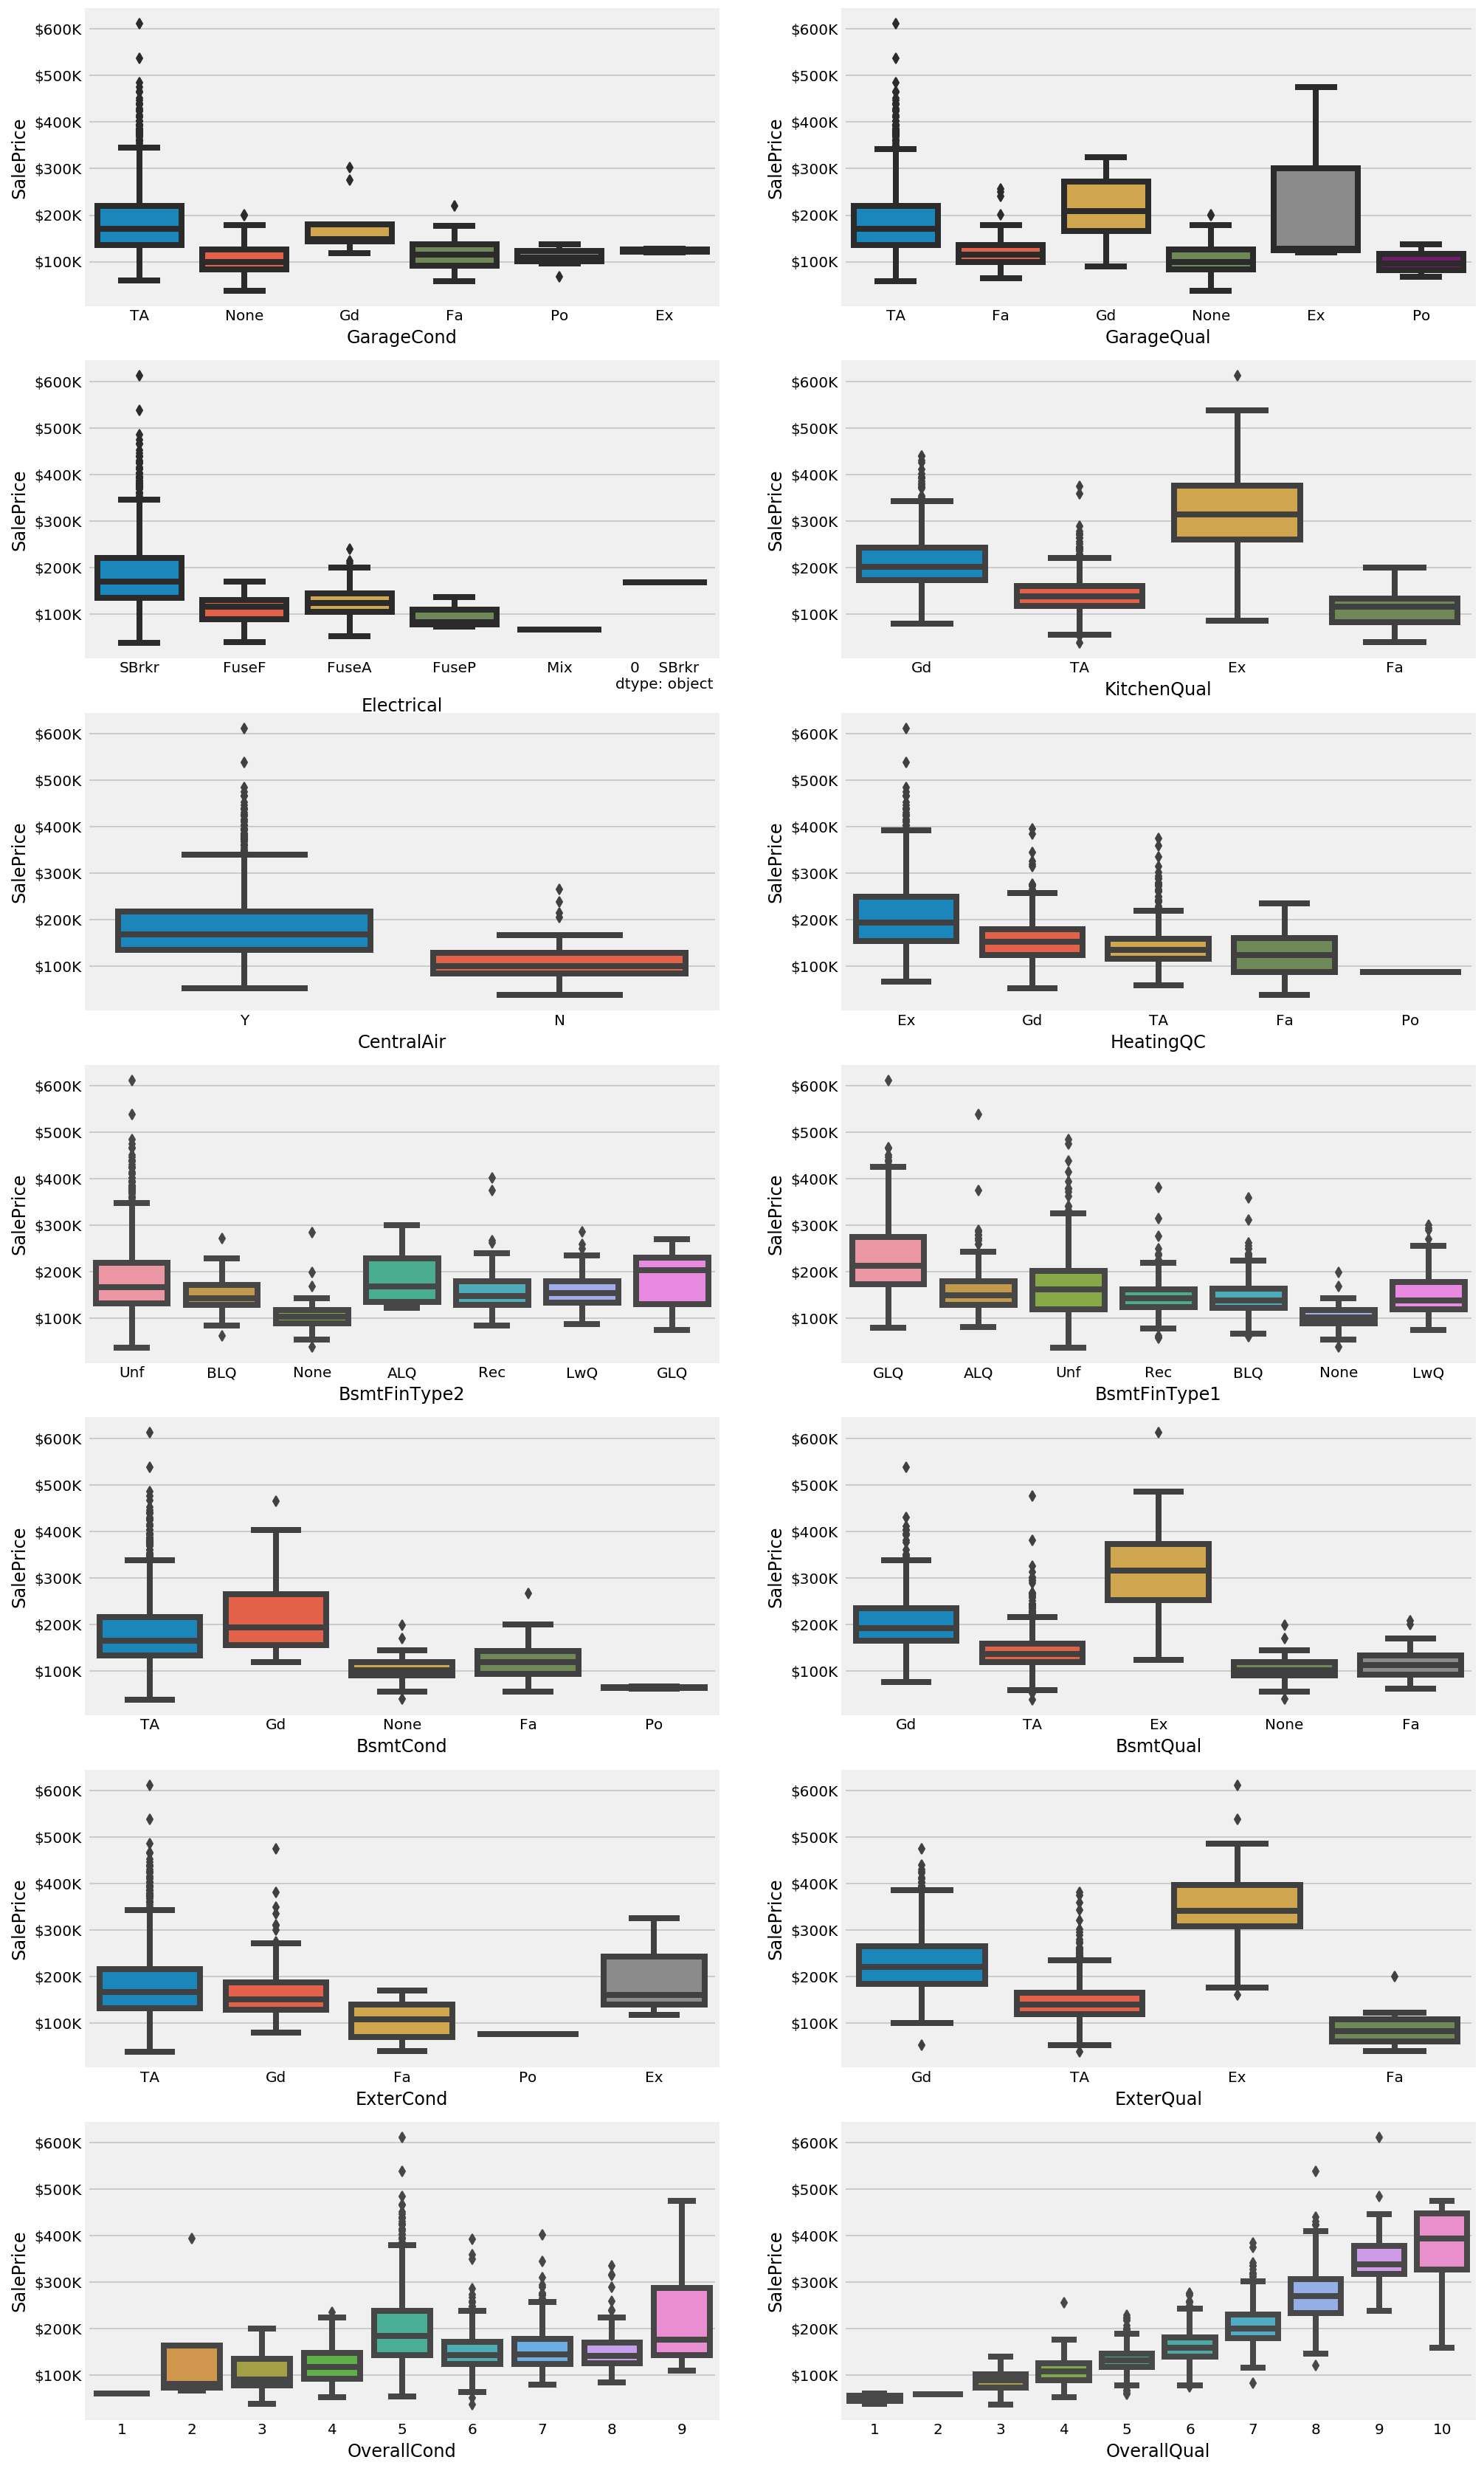

In [6]:
#Plots the boxplot of each against SalePrice
renovatables = ["OverallQual", "OverallCond", "ExterQual", 'ExterCond', 'BsmtQual', "BsmtCond", 'BsmtFinType1', 
                       'BsmtFinType2', 'HeatingQC', 'CentralAir','KitchenQual', 'Electrical', 'GarageQual',
                       'GarageCond']

fig, ax = plt.subplots(int(len(renovatables)/2),2, figsize = (15,30))

ax = ax.flatten()
for i in range(len(renovatables)):
    ax[i] = sns.boxplot(x = house[renovatables.pop()], y = house["SalePrice"], ax = ax[i])
    formatter = FuncFormatter(currency)
    ax[i].yaxis.set_major_formatter(formatter)

plt.show()

---



---

In [105]:
#Changeable features selected for regression: changeable_feat
changeable_feat =  "+ C(OverallQual) + C(OverallCond) + C(KitchenQual) + C(CentralAir) + C(HeatingQC) + C(Functional)"

#Initializes and combines our fixed features and changeables features fo use in patsy:all_feat
all_feat = fix_feat + changeable_feat

#Setting up patsy matrix and target:
#changeable_feat = '~ BsmtFinSF1 + GrLivArea + FullBath + TotRmsAbvGrd + Fireplaces + GarageArea + WoodDeckSF +\
#                    Total_SF + NeighborhoodPrice +  C(Condition1) + C(BldgType)+ Age -1\
#                     + C(OverallQual) + C(OverallCond) + C(ExterQual) + C(ExterCond) + C(BsmtQual)\
#                    + C(BsmtFinType1) + C(BsmtFinType2) + C(HeatingQC) + C(CentralAir) + C(KitchenQual) + C(Functional)\
#                    + Remod_Age -1'


In [106]:
import patsy
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Setting up patsy matrix and target:
X_r = patsy.dmatrix(all_feat, data=house, return_type='dataframe')
y_r = house["LogSalePrice"]

from sklearn.preprocessing import StandardScaler

#Standardize X matrix:
ss = StandardScaler()
X_rn = ss.fit_transform(X_r)

Xrn_train = X_rn[mask_train]
Xrn_test = X_rn[mask_test]

yr_train = y_r[mask_train]
yr_test = y_r[mask_test]

from sklearn.linear_model import LinearRegression
slr = LinearRegression()

model = slr.fit(Xrn_train, yr_train)


print("The R-squared score of the training dataset is: {:.2f}%".format(model.score(Xrn_train,yr_train)*100))
print("The R-squared score of the testing dataset is: {:.2f}%".format(model.score(Xrn_test,yr_test)*100))

ychange_trainpreds = model.predict(Xrn_train)
ychange_testpreds = model.predict(Xrn_test)

print("--------------------------------------------------------")
print("The RMSE of the training set is {:.2f}".format(np.sqrt(mean_squared_error(yr_train, ychange_trainpreds))))
print("The RMSE of the testing set is {:.2f}".format(np.sqrt(mean_squared_error(yr_test, ychange_testpreds))))

The R-squared score of the training dataset is: 88.16%
The R-squared score of the testing dataset is: 89.87%
--------------------------------------------------------
The RMSE of the training set is 0.13
The RMSE of the testing set is 0.13


In [109]:
import statsmodels.formula.api as smf

changeable_feat = "SalePrice" + all_feat

results = smf.ols(changeable_feat, data=house).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     190.6
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        10:31:02   Log-Likelihood:                 902.03
No. Observations:                1443   AIC:                            -1690.
Df Residuals:                    1386   BIC:                            -1389.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(Condition1)[Artery]    10.8042      0.141     76.738      0.000      10.528      11.080
C(Condition1)[Feedr]     10.8079      0.140     77.051      0.000      10.533      11.083
C(Condition1)[Norm]      10.8828      0.139     78.309      0.000      10.610      11.155
C(Condition1)[PosA]      10.9074      0.147     74.378      0.000      10.620      11.195
C(Condition1)[PosN]      10.8529      0.142     76.177      0.000      10.573      11.132
C(Condition1)[RRAe]      10.7831      0.145     74.302      0.000      10.498      11.068
C(Condition1)[RRAn]      10.8947      0.142     76.894      0.000      10.617      11.173
C(Condition1)[RRNe]      10.8369      0.167     64.783      0.000      10.509      11.165
C(Condition1)[RRNn]      10.8855      0.151     72.161      0.000      10.590      11.181
C(BldgType)[T.2fmCon]    -0.0153      0.026     -0.583      0.560      -0.067       0.036
C(BldgType)[T.Duplex]    -0.0407      0.021     -1.911      0.056      -0.082       0.001
C(BldgType)[T.Twnhs]     -0.1620      0.022     -7.402      0.000      -0.205      -0.119
C(BldgType)[T.TwnhsE]    -0.0700      0.014     -4.843      0.000      -0.098      -0.042
C(LotShape)[T.IR2]        0.0721      0.022      3.304      0.001       0.029       0.115
C(LotShape)[T.IR3]       -0.1167      0.044     -2.665      0.008      -0.203      -0.031
C(LotShape)[T.Reg]       -0.0063      0.008     -0.775      0.438      -0.022       0.010
C(OverallQual)[T.2]       0.2469      0.164      1.502      0.133      -0.076       0.569
C(OverallQual)[T.3]       0.3367      0.141      2.386      0.017       0.060       0.614
C(OverallQual)[T.4]       0.4381      0.139      3.150      0.002       0.165       0.711
C(OverallQual)[T.5]       0.5009      0.139      3.591      0.000       0.227       0.775
C(OverallQual)[T.6]       0.5609      0.140      4.020      0.000       0.287       0.835
C(OverallQual)[T.7]       0.6167      0.140      4.405      0.000       0.342       0.891
C(OverallQual)[T.8]       0.6871      0.141      4.881      0.000       0.411       0.963
C(OverallQual)[T.9]       0.7744      0.143      5.412      0.000       0.494       1.055
C(OverallQual)[T.10]      0.5935      0.147      4.038      0.000       0.305       0.882
C(OverallCond)[T.2]      -0.3072      0.207     -1.481      0.139      -0.714       0.100
C(OverallCond)[T.3]      -0.3311      0.193     -1.715      0.087      -0.710       0.048
C(OverallCond)[T.4]      -0.2109      0.196     -1.074      0.283      -0.596       0.174
C(OverallCond)[T.5]      -0.1870      0.196     -0.954      0.340      -0.572       0.198
C(OverallCond)[T.6]      -0.1537      0.196     -0.784      0.433      -0.538       0.231
C(OverallCond)[T.7]      -0.0964      0.196     -0.492      0.623      -0.481       0.288
C(OverallCond)[T.8]    

In [110]:
import statsmodels.formula.api as smf

changeable_feat = "SalePrice" + all_feat

results = smf.ols(changeable_feat, data=house).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     160.3
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        10:31:08   Log-Likelihood:                -16755.
No. Observations:                1443   AIC:                         3.362e+04
Df Residuals:                    1386   BIC:                         3.392e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(Condition1)[Artery]  1.625e+04    2.9e+04      0.560      0.576   -4.07e+04    7.32e+04
C(Condition1)[Feedr]   1.174e+04   2.89e+04      0.406      0.685    -4.5e+04    6.85e+04
C(Condition1)[Norm]    2.622e+04   2.86e+04      0.915      0.360      -3e+04    8.24e+04
C(Condition1)[PosA]    3.072e+04   3.02e+04      1.016      0.310   -2.86e+04       9e+04
C(Condition1)[PosN]    1.245e+04   2.94e+04      0.424      0.672   -4.52e+04    7.01e+04
C(Condition1)[RRAe]    1.001e+04   2.99e+04      0.335      0.738   -4.87e+04    6.87e+04
C(Condition1)[RRAn]    2.792e+04   2.92e+04      0.956      0.339   -2.94e+04    8.52e+04
C(Condition1)[RRNe]    1.509e+04   3.45e+04      0.438      0.662   -5.25e+04    8.27e+04
C(Condition1)[RRNn]    2.503e+04   3.11e+04      0.805      0.421    -3.6e+04     8.6e+04
C(BldgType)[T.2fmCon] -7942.4361   5430.364     -1.463      0.144   -1.86e+04    2710.185
C(BldgType)[T.Duplex] -1.203e+04   4388.245     -2.741      0.006   -2.06e+04   -3421.633
C(BldgType)[T.Twnhs]  -2.326e+04   4512.051     -5.155      0.000   -3.21e+04   -1.44e+04
C(BldgType)[T.TwnhsE] -1.536e+04   2979.744     -5.154      0.000   -2.12e+04   -9511.090
C(LotShape)[T.IR2]     2.119e+04   4497.006      4.711      0.000    1.24e+04       3e+04
C(LotShape)[T.IR3]    -1.779e+04   9025.655     -1.971      0.049   -3.55e+04     -87.787
C(LotShape)[T.Reg]     -153.2728   1664.895     -0.092      0.927   -3419.258    3112.713
C(OverallQual)[T.2]   -5734.2741   3.39e+04     -0.169      0.866   -7.22e+04    6.07e+04
C(OverallQual)[T.3]   -1.238e+04   2.91e+04     -0.426      0.670   -6.94e+04    4.47e+04
C(OverallQual)[T.4]   -7217.8643   2.87e+04     -0.252      0.801   -6.35e+04     4.9e+04
C(OverallQual)[T.5]   -7634.4608   2.88e+04     -0.266      0.791    -6.4e+04    4.88e+04
C(OverallQual)[T.6]   -1102.8265   2.88e+04     -0.038      0.969   -5.75e+04    5.53e+04
C(OverallQual)[T.7]    1.069e+04   2.89e+04      0.370      0.711   -4.59e+04    6.73e+04
C(OverallQual)[T.8]    3.884e+04    2.9e+04      1.339      0.181   -1.81e+04    9.58e+04
C(OverallQual)[T.9]     7.95e+04   2.95e+04      2.695      0.007    2.16e+04    1.37e+05
C(OverallQual)[T.10]   5.958e+04   3.03e+04      1.966      0.049     141.358    1.19e+05
C(OverallCond)[T.2]    2896.7151   4.27e+04      0.068      0.946   -8.09e+04    8.67e+04
C(OverallCond)[T.3]   -4450.7707   3.98e+04     -0.112      0.911   -8.25e+04    7.36e+04
C(OverallCond)[T.4]    8020.4031   4.05e+04      0.198      0.843   -7.14e+04    8.74e+04
C(OverallCond)[T.5]    1.269e+04   4.04e+04      0.314      0.754   -6.66e+04     9.2e+04
C(OverallCond)[T.6]    1.715e+04   4.04e+04      0.425      0.671   -6.21e+04    9.64e+04
C(OverallCond)[T.7]    2.705e+04   4.04e+04      0.669      0.503   -5.22e+04    1.06e+05
C(OverallCond)[T.8]    

Part 2 - Conclusion
---
---

We made some improvements compared to our model used for fixed characteristics. Our R-squared score from our testing dataset is 89.87% up from our original 86.17%.

Our Real Mean Squared Error is also now reduced to 0.13 down from 0.17 and 0.15.

As a reminder, we looked at these renovatable charateristics to further explore.

+ OverallQual

From our regression with the SalesPrice, it appears to be beneficial to renovate if the Overall Quality of the house is rated below a 6, as each increment of tier from 6 to 9 increases by roughly $20k - $50k 

+ OverallCond

Overall Condition does not seem to have as much affect compared to OverallQual

+ KitchenQual
+ CentralAir
+ HeatingQC
+ Functional
---


Part 2 - Extra
---

---

Anything below this is me trying new algorithms and techniques. For the sake of the project and my sanity I have kept the regression and predicting to a naive basic model.

For example, I had originally attempted to cross validate the dataset and use it's predictions. This fell short when I realized it made no sense, since cross validation creates n arbitrary Train/Test splits. While this is great, it does not help to answer our question since we specifically want the testing set to be of houses sold in 2010.

---

In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.01)
model = lasso.fit(Xrn_train, yr_train)

print("The R-squared score of the training dataset is: {:.2f}%".format(model.score(Xrn_train,yr_train)*100))
print("The R-squared score of the testing dataset is: {:.2f}%".format(model.score(Xrn_test,yr_test)*100))

ylasso_trainpreds = lasso.predict(Xrn_train)
ylasso_testpreds = lasso.predict(Xrn_test)

print("--------------------------------------------------------")
print("The RMSE of the training set is {:.2f}".format(np.sqrt(mean_squared_error(yr_train, ylasso_trainpreds))))
print("The RMSE of the testing set is {:.2f}".format(np.sqrt(mean_squared_error(yr_test, ylasso_testpreds))))

In [ ]:
from sklearn.linear_model import lasso_path, LassoCV

lassoCV = linear_model.Lasso(alpha=0.01)
model = lassoCV.fit(Xrn_train, yr_train)

print("The R-squared score of the training dataset is: {:.2f}%".format(model.score(Xrn_train,yr_train)*100))
print("The R-squared score of the testing dataset is: {:.2f}%".format(model.score(Xrn_test,yr_test)*100))

ylassoCV_trainpreds = lasso.predict(Xrn_train)
ylassoCV_testpreds = lasso.predict(Xrn_test)

print("--------------------------------------------------------")
print("The RMSE of the training set is {:.2f}".format(np.sqrt(mean_squared_error(yr_train, ylassoCV_trainpreds))))
print("The RMSE of the testing set is {:.2f}".format(np.sqrt(mean_squared_error(yr_test, ylassoCV_testpreds))))